In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import linalg

### We want to minimize:
### $$
f(x,y) = \sin(\pi x) \sin(3 \pi y)
$$

### a) Plot this function with both wire_frame and contour on the window $0<x<1$ and $0<y<1$.

In [2]:
def f_for_plot(x,y):
    z = np.sin(np.pi*x) * np.sin(3*np.pi*y)
    return z

In [3]:
x = np.linspace(0,1,20)
y = np.linspace(0,1,20)
X,Y = np.meshgrid(x,y)

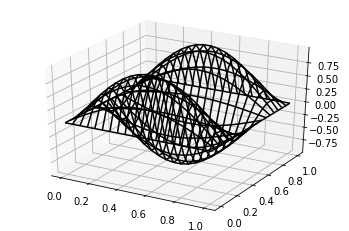

In [4]:
Z = f_for_plot(X,Y)
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color = 'black')
plt.show()

In [5]:
x = np.linspace(0,1,100)
y = np.linspace(0,1,100)
X,Y = np.meshgrid(x,y)

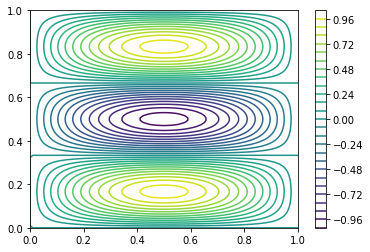

In [6]:
Z = f_for_plot(X,Y)
plt.contour(X, Y, Z,30)
plt.colorbar()
plt.show()

### b) From the graph it is pretty clear where is the minimum. Use your knowledge of the sin function to determine exactly were the minimum is. What is the value of $f(x,y)$ at this point?

Answer: $x= 0.5$ and $y = 0.5$

In [7]:
f_for_plot(0.5,0.5)

-1.0

### c) Compute the gradient and Hessian Matrix of $f(x,y)$.

In [8]:
def gradf(x):
    w0 = np.pi
    w1 = 3*np.pi
    dfdx = w0 * np.cos(w0*x[0]) * np.sin(w1*x[1])
    dfdy = w1 * np.sin(w0*x[0]) * np.cos(w1*x[1])
    g = np.array([dfdx,dfdy])
    return g

In [9]:
def Hf(x):
    w0 = np.pi
    w1 = 3*np.pi
    dxdx = -w0*w0*np.sin(w0*x[0]) * np.sin(w1*x[1])
    dxdy =  w0*w1 * np.cos(w0*x[0]) * np.cos(w1*x[1])
    dydy = -w1*w1*np.sin(w0*x[0]) * np.sin(w1*x[1])
    hessian =  np.array( [ [dxdx,dxdy],[dxdy,dydy] ] )
    return hessian

### d) Do Newton's algorithm with initial guess (0.55,0.55). Are you getting back the min you computed earlier? Plot the successive iterates

In [36]:
def newton_store(gradf,Hf,x0,num_iter):
    x = x0
    iterates = np.zeros( (num_iter,2))
    
    for i in range(0,num_iter):
        iterates[i,:] = x
        y = linalg.solve(Hf(x), - gradf(x))
        x = x + y
        print(x)
    return iterates
        

In [37]:
x0 = np.array([0.55,0.55])
iterates = newton_store(gradf,Hf,x0,5)

[0.48607974 0.4942182 ]
[0.5000504  0.50001685]
[0.5 0.5]
[0.5 0.5]
[0.5 0.5]


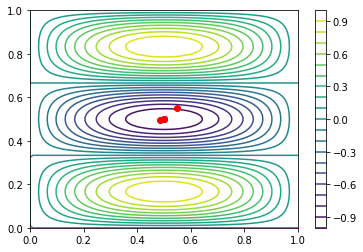

In [38]:
Z = f_for_plot(X,Y)
plt.contour(X, Y, Z,20)
plt.plot(iterates[:,0],iterates[:,1],'ro')
plt.colorbar()
plt.show()

### d) Do Newton's algorithm with initial guess (0.7,0.8). Plot the successive iterates. Are you getting a minima? Explain what is happening?

In [39]:
x0 = np.array([0.7,0.8])
iterates = newton_store(gradf,Hf,x0,4)

[0.42922944 0.8557818 ]
[0.50468729 0.83177095]
[0.49999864 0.83333379]
[0.5        0.83333333]


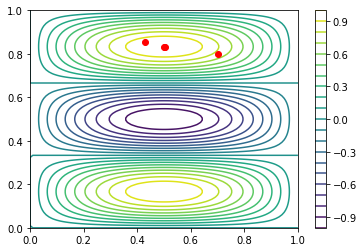

In [40]:
Z = f_for_plot(X,Y)
plt.contour(X, Y, Z,20)
plt.plot(iterates[:,0],iterates[:,1],'ro')
plt.colorbar()
plt.show()